Notebook for Optim application. Notebook for supplementary material of a submitted publication. 

### Imports and settings

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json


%matplotlib widget
import time
import numpy as np
from aeromaps import create_process
from aeromaps.core.models import (
    models_optim_simple,
)

import gemseo as gm

gm.configure_logger()

<RootLogger root (INFO)>

# 1- Scenario initialisation and settings

The first phase corresponds to running a first, central scenario with AeroMAPS. Other runs ar performed afterwards.

In [2]:
from aeromaps.utils.functions import create_partitioning

In [3]:
create_partitioning(file="data_optim/aeroscope_europe_data.csv", path="data_optim")

## 2. Run AeroMAPS on this studied scope

In [4]:
%matplotlib widget
from aeromaps import create_process
from aeromaps.core.models import default_models_top_down

In [5]:
models = {
    "models_optim_simple": models_optim_simple,
}

Create process as usual, the partitionning is recuperated as specified in the config file.

In [6]:
process = create_process(
    configuration_file="data_optim/config.json", models=models, use_fleet_model=False
)

## 1-a) Air traffic evolution

As of April 2024, AeroMAPS is considering an exgenous growth rate.
For the purposes of this article, an uniform growth rate of 3% is set. This is significantly lower from industry prospects such as [Airbus GMF: 3.6%](https://www.airbus.com/en/products-services/commercial-aircraft/market/global-market-forecast) or [Boeing CMO: 3.8%](https://www.boeing.com/content/dam/boeing/boeingdotcom/market/assets/downloads/CMO_2022_Report_FINAL_v02.pdf), but higher than [IEA Net Zero: 2.1% (2019 as base year)](https://www.iea.org/reports/net-zero-roadmap-a-global-pathway-to-keep-the-15-0c-goal-in-reach).


In [7]:
## Growth rate by category [%]
process.parameters.cagr_passenger_short_range_reference_periods = []
process.parameters.cagr_passenger_short_range_reference_periods_values = [1.0]
process.parameters.cagr_passenger_medium_range_reference_periods = []
process.parameters.cagr_passenger_medium_range_reference_periods_values = [1.0]
process.parameters.cagr_passenger_long_range_reference_periods = []
process.parameters.cagr_passenger_long_range_reference_periods_values = [1.0]
process.parameters.cagr_freight_reference_periods = []
process.parameters.cagr_freight_reference_periods_values = [1.0]

## 1-b) Aircraft fleet

Top-down fleet, without hydrogen aircraft, callibrated on the fleet of the MACC applciation, with drop-in instead of h2  
http://localhost:8888/lab/tree/aeromaps/notebooks/data_cost/top_down_cost_callibration_phd.ipynb

Mean annual efficiency improvement: 1.4% --> applied to all catgeories

In [8]:
process.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years = []
process.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years_values = [1.4]
process.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years = []
process.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years_values = [1.4]
process.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years = []
process.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years_values = [1.4]

## Hydrogen aircraft
# NONE

### 1-c) Operational improvements

Operational improvements are considered via two opportunities. 
- Load factor improvement: improvement to 89% at the end of the scenario.
- Operational efficiency (better ATM, aircrfat MRO and operational optimisation): improvement of 8% in 25y. 

Cost savings incur through the fuel savings. However, it could come at an extra cost (non-energy). This parameter is modelled, but not considered in this article due to lack of specific informations to the best of our knowldege.


In [9]:
process.parameters.load_factor_end_year = 89.0  # 2019 value: 82.399312

In [10]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

## 1-d) Energy

Top-down callibrated on the values of teh MACC apllication.
Faster optim but caution as MFSP full computation is more detailled: larges use of e-fuel in the begining influence late mFSp (no-decomissioning)

In [11]:
# # Energy settings: production choices

# # Aircraft energy - Introduction of alternative drop-in fuels

# ## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_reference_years = [2030, 2035, 2040, 2045, 2050]
# process.parameters.biofuel_share_reference_years_values = [0, 2, 4.8, 15, 24, 27, 35]
process.parameters.electrofuel_share_reference_years = [2030, 2035, 2040, 2045, 2050]
# process.parameters.electrofuel_share_reference_years_values = [0, 0, 1.2, 5, 10, 15, 35]


## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
process.parameters.biofuel_hefa_fog_share_reference_years = []
process.parameters.biofuel_hefa_fog_share_reference_years_values = [0.6]
process.parameters.biofuel_hefa_others_share_reference_years = []
process.parameters.biofuel_hefa_others_share_reference_years_values = [12.5]
process.parameters.biofuel_ft_others_share_reference_years = []
process.parameters.biofuel_ft_others_share_reference_years_values = [68.9]
process.parameters.biofuel_ft_msw_share_reference_years = []
process.parameters.biofuel_ft_msw_share_reference_years_values = [6.6]

In [12]:
process.parameters.biofuel_hefa_fog_mfsp_simple_reference_years = []
process.parameters.biofuel_hefa_fog_mfsp_simple_reference_years_values = [0.815488]
process.parameters.biofuel_hefa_others_mfsp_simple_reference_years = []
process.parameters.biofuel_hefa_others_mfsp_simple_reference_years_values = [1.052703]
process.parameters.biofuel_ft_others_mfsp_simple_reference_years = []
process.parameters.biofuel_ft_others_mfsp_simple_reference_years_values = [1.378082]
process.parameters.biofuel_ft_msw_mfsp_simple_reference_years = []
process.parameters.biofuel_ft_msw_mfsp_simple_reference_years_values = [1.142423]
process.parameters.biofuel_atj_mfsp_simple_reference_years = []
process.parameters.biofuel_atj_mfsp_simple_reference_years_values = [1.38668]

process.parameters.electrofuel_mfsp_simple_reference_years = [
    2020,
    2021,
    2022,
    2023,
    2024,
    2025,
    2026,
    2027,
    2028,
    2029,
    2030,
    2031,
    2032,
    2033,
    2034,
    2035,
    2036,
    2037,
    2038,
    2039,
    2040,
    2041,
    2042,
    2043,
    2044,
    2045,
    2046,
    2047,
    2048,
    2049,
    2050,
]
process.parameters.electrofuel_mfsp_simple_reference_years_values = [
    3.720546,
    3.720546,
    3.720546,
    3.720546,
    3.720546,
    3.720546,
    3.720546,
    3.573659,
    3.426978,
    3.277308,
    3.130003,
    3.095717,
    3.062247,
    3.029682,
    2.998903,
    2.971869,
    2.946851,
    2.923276,
    2.901135,
    2.882374,
    2.866464,
    2.852876,
    2.841350,
    2.829845,
    2.807006,
    2.774737,
    2.737160,
    2.698305,
    2.660365,
    2.624329,
    2.590476,
]

# Enerdata scenario europe-specific data (https://eneroutlook.enerdata.net/forecast-world-co2-intensity-of-electricity-generation.html)
process.parameters.electricity_emission_factor_reference_years = [
    2020,
    2025,
    2030,
    2035,
    2040,
    2045,
    2050,
]
process.parameters.electricity_emission_factor_reference_years_values = [
    205,
    175,
    92,
    47,
    31,
    19,
    12,
]

# Optimisation parameters
europe_ask_share = 15.49 / 100

process.parameters.aviation_carbon_budget_objective = 3.0 * europe_ask_share  # --> sensitivity 4.8

process.parameters.biomass_availability_constraint_trajectory_reference_years = [
    2020,
    2030,
    2040,
    2050,
]
process.parameters.biomass_availability_constraint_trajectory_reference_years_values = [
    62.8 * europe_ask_share,
    72.1 * europe_ask_share,
    97.8 * europe_ask_share,
    101.8 * europe_ask_share,
]

process.parameters.electricity_availability_constraint_trajectory_reference_years = [
    2020,
    2030,
    2040,
    2050,
]
process.parameters.electricity_availability_constraint_trajectory_reference_years_values = [
    102.0456 * europe_ask_share,
    137.5452 * europe_ask_share,
    212.7996 * europe_ask_share,
    276.6168 * europe_ask_share,
]

process.parameters.volume_ramp_up_constraint_biofuel = 0.2 * europe_ask_share
process.parameters.rate_ramp_up_constraint_biofuel = 0.2

process.parameters.volume_ramp_up_constraint_electrofuel = 0.2 * europe_ask_share
process.parameters.rate_ramp_up_constraint_electrofuel = 0.2

## 1-e) Other process.parameters 

Downscaling not automatic

In [13]:
# Environmental limits

## Carbon budgets and Carbon Dioxide Removal [GtCO2]
process.parameters.net_carbon_budget = 850.0
process.parameters.carbon_dioxyde_removal_2100 = 285.0

In [14]:
# Allocation settings

## Aviation share of the global (equivalent) carbon budget [%]
process.parameters.aviation_carbon_budget_allocated_share = 2.6
process.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

## Aviation share of the global energy resources (biomass and electricity) [%]
process.parameters.aviation_biomass_allocated_share = 9.90
process.parameters.aviation_electricity_allocated_share = 5.0

## 2 - Problem definition

### Cas 1 

min cumulative_total_airline_cost_discounted

w.r.t. biofuel_share_reference_years_values, electrofuel_share_reference_years_values, 

s.t. cumulative_co2_emissions, electricity_consumption, biomass_consumption, max(biofuel_share_prospective + electrofuel_share_prospective)



In [15]:
from gemseo.algos.design_space import DesignSpace
from gemseo import generate_n2_plot, create_scenario

process.setup()

design_space = DesignSpace()


# design_space.add_variable("electrofuel_share_reference_years_values", size=6, lower_bound=[0, 0, 0, 0, 0, 0], upper_bound=[100, 100,100, 100, 100, 100], value=[0, 1.2, 5, 10, 15, 35])
# design_space.add_variable("biofuel_share_reference_years_values", size=6, lower_bound=[0, 0, 0, 0, 0, 0], upper_bound=[100, 100,100, 100, 100, 100], value=[2, 4.8, 15, 24, 27, 35])


design_space.add_variable(
    "electrofuel_share_reference_years_values",
    size=5,
    lower_bound=[1e-5, 1e-5, 1e-5, 1e-5, 1e-5],
    upper_bound=[100, 100, 100, 100, 100],
    value=[1e-3, 1e-3, 1e-3, 1e-3, 1e-3],
)
design_space.add_variable(
    "biofuel_share_reference_years_values",
    size=5,
    lower_bound=[1e-5, 1e-5, 1e-5, 1e-5, 1e-5],
    upper_bound=[100, 100, 100, 100, 100],
    value=[2.09094371, 3.97747159, 13.93018145, 30.18409615, 53.08513342],
)


#                   value=[ 2.95630584, 12.01966251, 24.51769195, 45.09794791, 50.85012186,
# 53.05347661]

objective_name = "cumulative_total_airline_cost_discounted_obj"


process.gemseo_settings["design_space"] = design_space

process.gemseo_settings["objective_name"] = objective_name

# process.gemseo_settings["scenario_type"]="DOE"
process.gemseo_settings["scenario_type"] = "MDO"

# Create a GEMSEO scenario
process.create_gemseo_scenario()

# Set differention method (only use for gradient based optimizers)
process.scenario.set_differentiation_method("finite_differences")

# Add constraints
all_constraints = [
    "aviation_carbon_budget_constraint",
    "blend_completeness_constraint",
    "electricity_trajectory_constraint",
    "biomass_trajectory_constraint",
    "electrofuel_use_growth_constraint",
    "biofuel_use_growth_constraint",
    "biofuel_use_no_degrowth_constraint",
    "electrofuel_use_no_degrowth_constraint",
]


for constraint in all_constraints:
    process.scenario.add_constraint(constraint, constraint_type="ineq")


process.scenario.formulation.optimization_problem.objective = (
    process.scenario.formulation.optimization_problem.objective * 1e-12
)

##### Base MDO -> in source for DOE [...]

# Configure the algorithm used
algo_options = {
    "ftol_rel": 0.00001,
    "ctol_abs": 0.0001,
    "ftol_abs": 0.0001,
    "normalize_design_space": True,
    "init_step": 1,
}
process.scenario.options = {"algo": "NLOPT_COBYLA", "max_iter": 500, "algo_options": algo_options}

 WARNING - 18:26:07: No coupling in MDA, switching chain_linearize to True.


In [16]:
process.compute()

    INFO - 18:26:07:  
    INFO - 18:26:07: *** Start MDOScenario execution ***
    INFO - 18:26:07: MDOScenario
    INFO - 18:26:07:    Disciplines: MDAChain
    INFO - 18:26:07:    MDO formulation: MDF
    INFO - 18:26:07: Optimization problem:
    INFO - 18:26:07:    minimize 1e-12*cumulative_total_airline_cost_discounted_obj(electrofuel_share_reference_years_values, biofuel_share_reference_years_values)
    INFO - 18:26:07:    with respect to biofuel_share_reference_years_values, electrofuel_share_reference_years_values
    INFO - 18:26:07:    subject to constraints:
    INFO - 18:26:07:       aviation_carbon_budget_constraint(electrofuel_share_reference_years_values, biofuel_share_reference_years_values) <= 0
    INFO - 18:26:07:       blend_completeness_constraint(electrofuel_share_reference_years_values, biofuel_share_reference_years_values) <= 0
    INFO - 18:26:07:       electricity_trajectory_constraint(electrofuel_share_reference_years_values, biofuel_share_reference_years_v

Pre-compute time: 0.026928424835205078 seconds


    INFO - 18:28:41:     34%|███▍      | 169/500 [02:34<05:02,  1.10 it/sec, obj=4.48]
    INFO - 18:28:41: Optimization result:
    INFO - 18:28:41:    Optimizer info:
    INFO - 18:28:41:       Status: None
    INFO - 18:28:41:       Message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO stopped the driver.
    INFO - 18:28:41:       Number of calls to the objective function by the optimizer: 170
    INFO - 18:28:41:    Solution:
    INFO - 18:28:41:       The solution is feasible.
    INFO - 18:28:41:       Objective: 4.482901175637612
    INFO - 18:28:41:       Standardized constraints:
    INFO - 18:28:41:          aviation_carbon_budget_constraint = -1.194558881671139e-16
    INFO - 18:28:41:          biofuel_use_growth_constraint = -0.0016771004545076693
    INFO - 18:28:41:          biofuel_use_no_degrowth_constraint = -0.002745841766182809
    INFO - 18:28:41:          biomass_trajectory_constraint = 0.0
    INFO - 18:28:41:        

Compute time: 154.35920357704163 seconds
Post-compute time: 1.1065750122070312 seconds


In [17]:
process.scenario.get_result().design_variable_names_to_values

{'electrofuel_share_reference_years_values': array([1.00000000e-05, 1.00000000e-05, 1.00000000e-05, 1.00000000e-05,
        5.26687857e-02]),
 'biofuel_share_reference_years_values': array([ 2.1144481 ,  5.47333262, 15.63800032, 32.11393245, 53.35804859])}

In [18]:
# ####DOE
# process.gemseo_settings["doe_input_names"] = ["electrofuel_share_reference_years_values", "biofuel_share_reference_years_values"]
# process.gemseo_settings["doe_output_names"] = ["cumulative_total_airline_cost_discounted_obj"]

# process.create_gemseo_doe()

# sample_1 = [0.05, 1.2, 5, 10, 15, 35,
#             2, 4.8, 15, 24, 27, 35]
# sample_2 = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
#             2, 6, 20, 34, 42, 70]
# sample_3 = [2, 6, 20, 34, 42, 70,
#             0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
# sample_4 = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
#             0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
# sample_5 = [20,20,30,30,40,40,
#             20,20,30,30,40,40]

# process.samples = np.array([sample_1, sample_2, sample_3, sample_4, sample_5])

# 2- Compute

Run AeroMAPS process

In [19]:
# process.compute()

In [20]:
# process.scenario_doe.get_result().optimization_problems_to_results

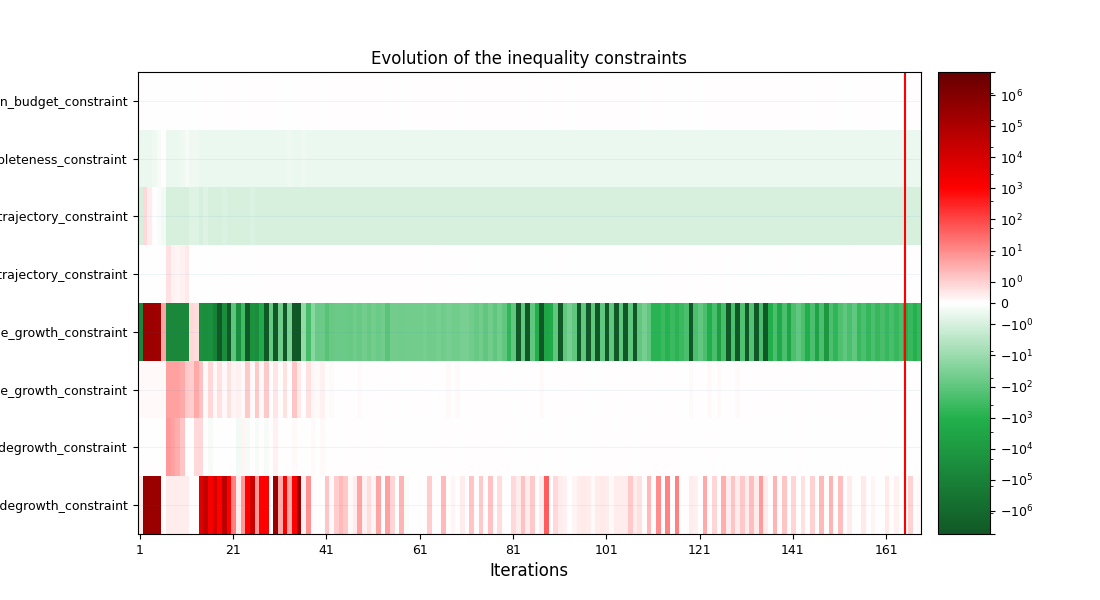

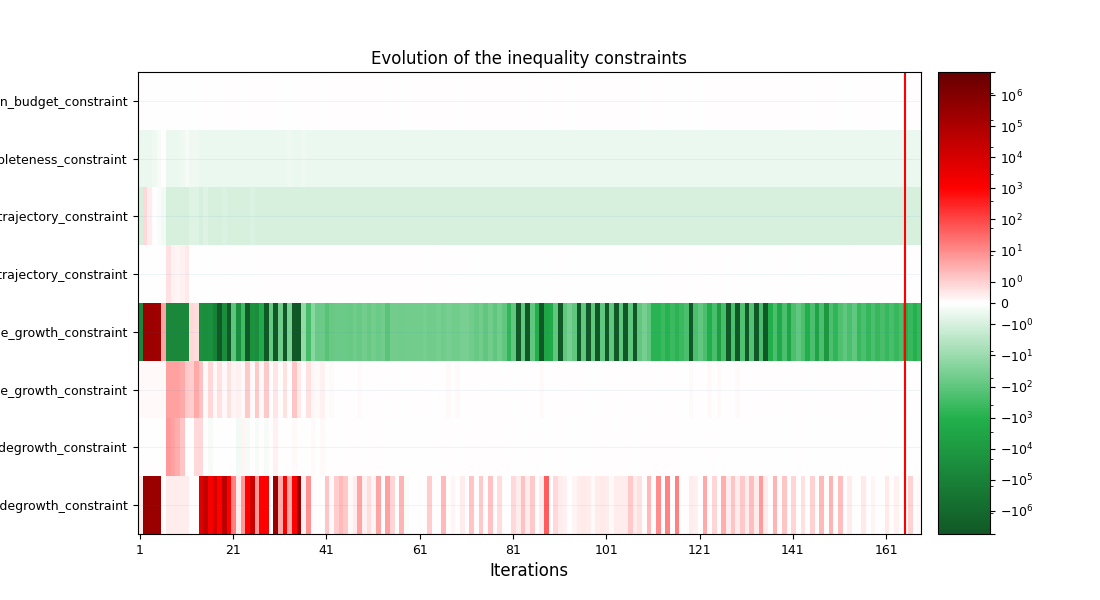

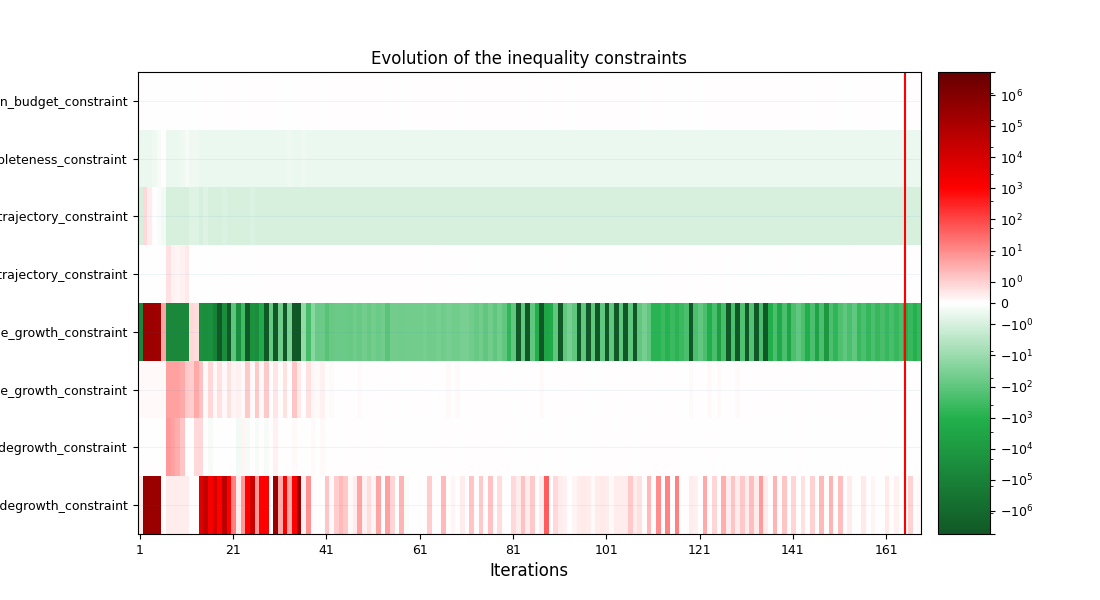

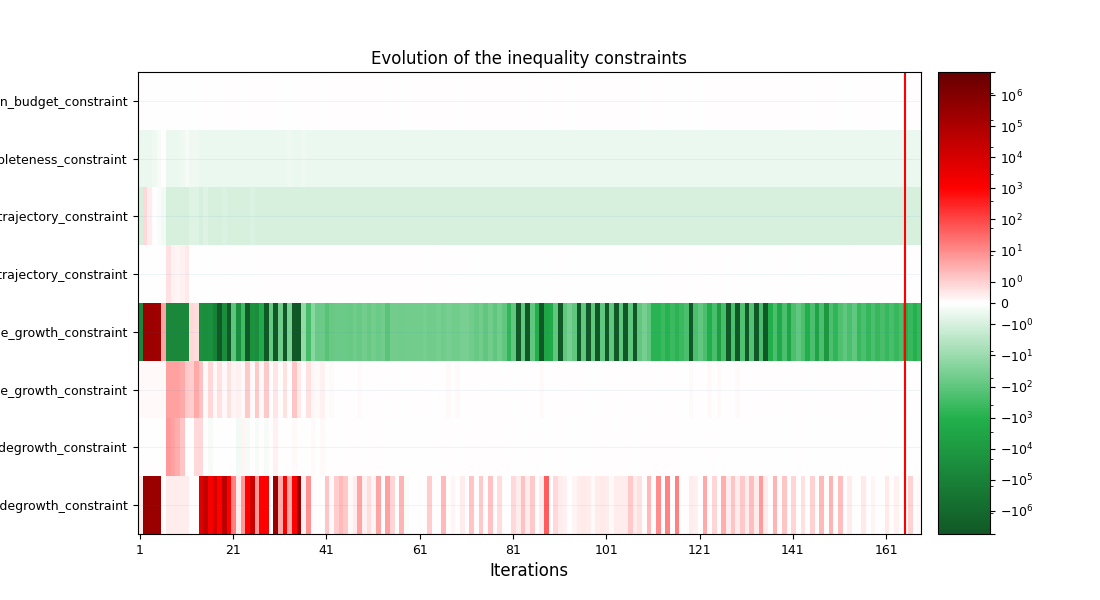

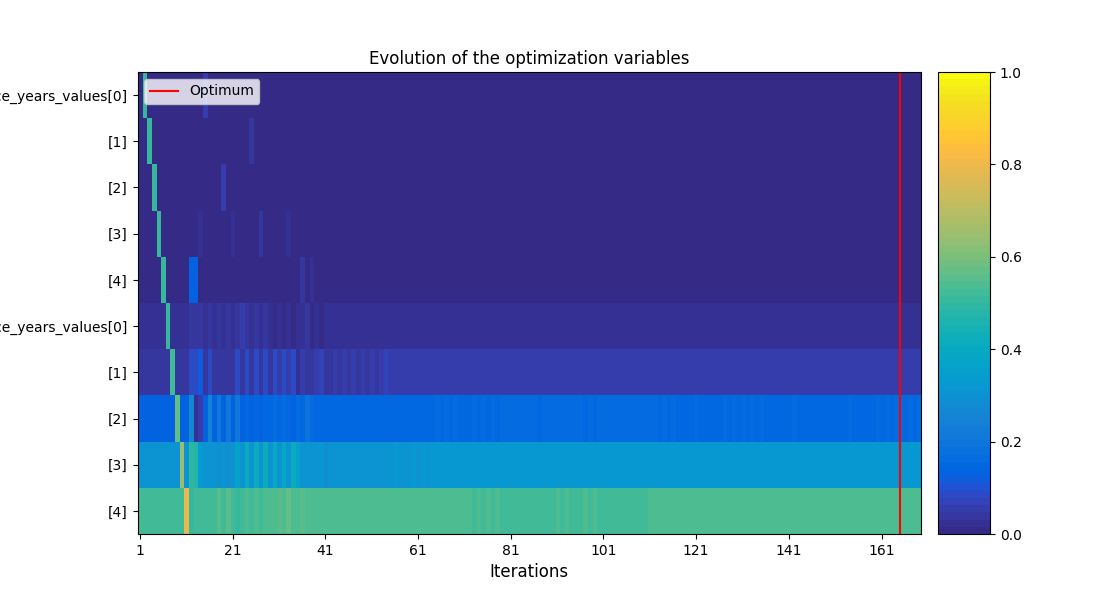

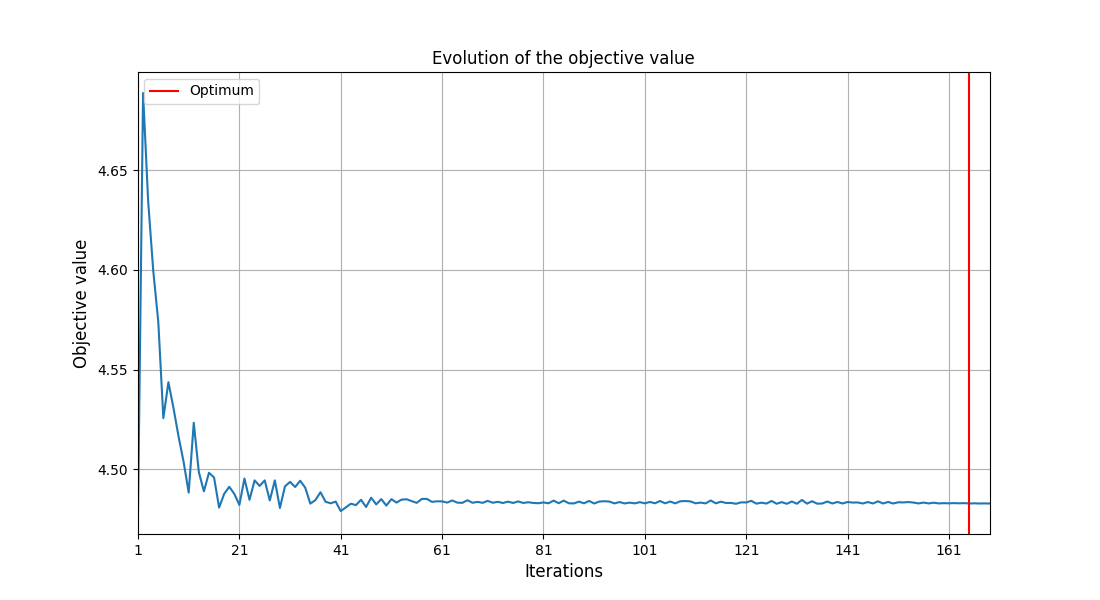

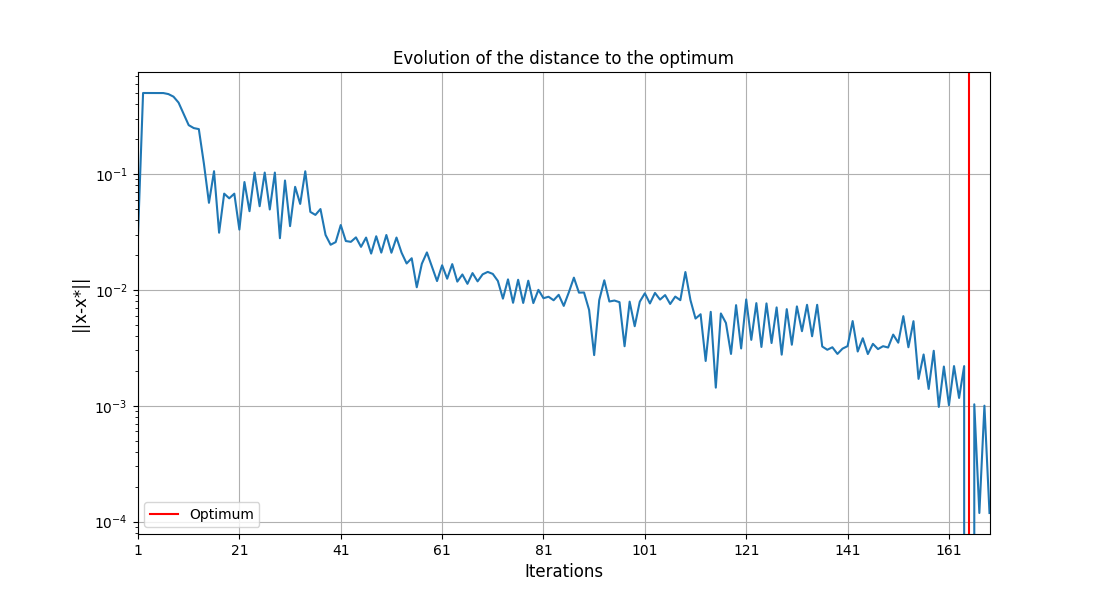

In [21]:
process.scenario.post_process("OptHistoryView", save=False, show=True)

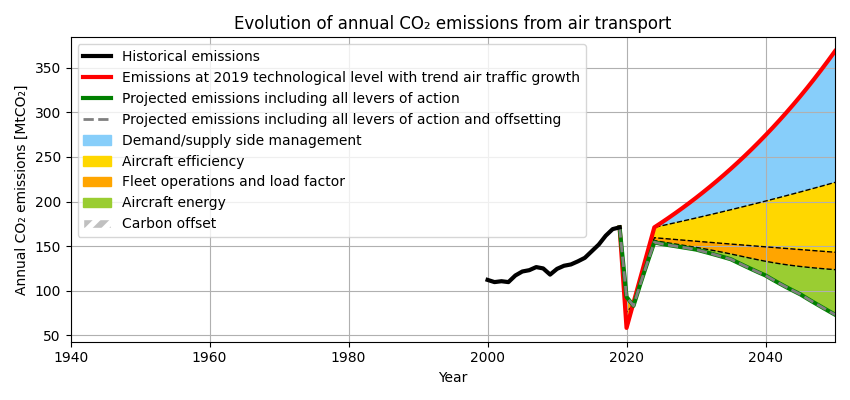

In [22]:
process.plot("air_transport_co2_emissions")

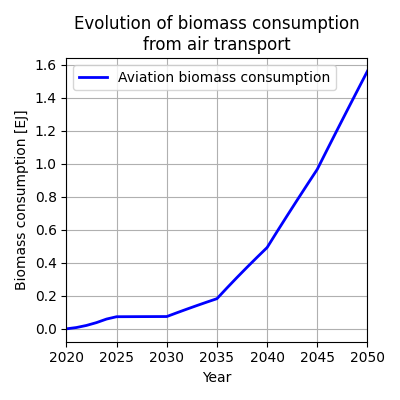

In [23]:
process.plot("biomass_consumption")

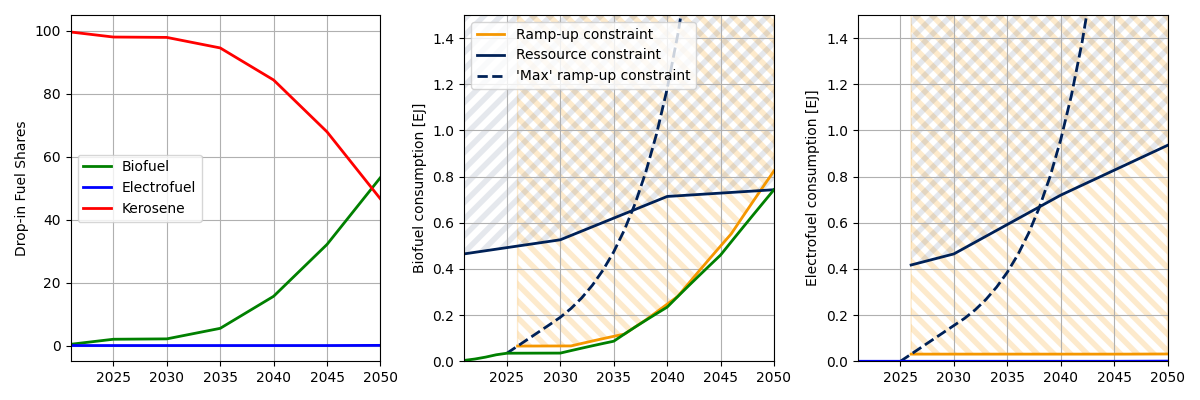

In [24]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(12, 4))

ax1.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[process.data["years"]["prospective_years"], "biofuel_share"],
    color="green",
    linestyle="-",
    label="Biofuel",
    linewidth=2,
)

ax1.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[process.data["years"]["prospective_years"], "electrofuel_share"],
    color="blue",
    linestyle="-",
    label="Electrofuel",
    linewidth=2,
)

ax1.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[process.data["years"]["prospective_years"], "kerosene_share"],
    color="red",
    linestyle="-",
    label="Kerosene",
    linewidth=2,
)

ax1.grid()
ax1.legend()
ax1.set_ylabel("Drop-in Fuel Shares")
ax1.set_xlim(2021, 2050)


ax2.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "annual_biofuel_growth_constraint_viz"
    ]
    / 1e12,
    color="#F59700",
    linestyle="-",
    label="Ramp-up constraint",
    linewidth=2,
)

ax2.fill_between(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "annual_biofuel_growth_constraint_viz"
    ]
    / 1e12,
    3,
    hatch="\\\\",
    edgecolor="#F59700",
    facecolor="none",
    alpha=0.2,
)


ax2.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "biofuel_max_availability_viz"
    ]
    / 1e12,
    color="#002157",
    linestyle="-",
    label="Ressource constraint",
    linewidth=2,
)

ax2.fill_between(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "biofuel_max_availability_viz"
    ]
    / 1e12,
    3,
    hatch="//",
    edgecolor="#002157",
    facecolor="none",
    linewidth=0,
    alpha=0.1,
)


ax2.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "biofuel_growth_constraint_theoretical_max_viz"
    ]
    / 1e12,
    color="#002157",
    linestyle="--",
    label="'Max' ramp-up constraint",
    linewidth=2,
)


ax2.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "energy_consumption_biofuel"
    ]
    / 1e12,
    color="green",
    linestyle="-",
    # label="Aviation biofuel consumption",
    linewidth=2,
)


ax2.grid()
# ax2.set_xlabel("Year")
ax2.set_ylabel("Biofuel consumption [EJ]")
ax2.legend(loc="upper left")
ax2.set_xlim(2021, 2050)
ax2.set_ylim(0, 1.5)


ax3.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "annual_electrofuel_growth_constraint_viz"
    ]
    / 1e12,
    color="#F59700",
    linestyle="-",
    # label="Electrofuel ramp-up constraint",
    linewidth=2,
)

ax3.fill_between(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "annual_electrofuel_growth_constraint_viz"
    ]
    / 1e12,
    3,
    hatch="\\\\",
    edgecolor="#F59700",
    facecolor="none",
    alpha=0.2,
)


ax3.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "electrofuel_max_availability_viz"
    ]
    / 1e12,
    color="#002157",
    linestyle="-",
    # label="Electricity availability constraint",
    linewidth=2,
)

ax3.fill_between(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "electrofuel_max_availability_viz"
    ]
    / 1e12,
    3,
    hatch="//",
    edgecolor="#002157",
    facecolor="none",
    linewidth=0,
    alpha=0.1,
)


ax3.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"],
        "electrofuel_growth_constraint_theoretical_max_viz",
    ]
    / 1e12,
    color="#002157",
    linestyle="--",
    # label="Electrofuel theoretical max ramp-Up constraint",
    linewidth=2,
)


ax3.plot(
    process.data["years"]["prospective_years"],
    process.vector_outputs_df.loc[
        process.data["years"]["prospective_years"], "energy_consumption_electrofuel"
    ]
    / 1e12,
    color="blue",
    linestyle="-",
    # label="Aviation electrofuel consumption",
    linewidth=2,
)


ax3.grid()
ax3.set_ylabel("Electrofuel consumption [EJ]")
ax3.set_xlim(2021, 2050)
ax3.set_ylim(0, 1.5)

fig.tight_layout()
fig.savefig("ressource_constraints.png", dpi=800)

In [28]:
process.vector_outputs_df["cumulative_co2_emissions"][2050]

3.7138325431808297

In [29]:
process.vector_outputs_df["co2_emissions_including_energy"][2050]

73.0309561815299

In [30]:
process.vector_outputs_df["cumulative_total_airline_cost_discounted"][2050]

4482900864733.707

In [31]:
max(process.vector_outputs_df["electricity_consumption"].dropna())

0.0017243823221669403

In [32]:
sum(process.vector_outputs_df["electricity_consumption"].dropna())

0.005215700512282612

In [33]:
max(process.vector_outputs_df["biomass_consumption"].dropna())

1.56111318

In [34]:
sum(process.vector_outputs_df["biomass_consumption"].dropna())

13.64900018608748